In [5]:
import pandas as pd
import altair as alt
from vega_datasets import data
alt.__version__

'3.0.1'

In [6]:
## run this code but don't worry about what it does
import altair as alt

def workshop_theme(*args, **kwargs):
    return {
            "width": 500,
            "height": 300,
            "config": {
              "style": {
                "bar": {
                  "size": 20
                },
                "guide-title": {
                  "fontSize": 25
                },
                "guide-label": {
                  "fontSize": 20
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 100,
                "titleFontSize": 20,
                "labelFontSize": 18
              },
              "axis": {
                "titleFontSize": 20,
                "labelFontSize": 18
              }
            }
          }
          

alt.themes.register('workshop_theme', workshop_theme)
alt.themes.enable('workshop_theme');
#alt.themes.enable('default')

# Grammar of Graphics


- a common language for specifying how to map raw data to visual properties on a chart
- thinking about charts as simply a composition of geometric shapes and visual encodings (size, shape, color, position, etc...)
 - can lead to consise/expressive code since many charts share a common grammar
- in contrast to charts as being class-based (bar chart, histogram, pie, stacked bar, scatter, etc...)
 - can lead to verbose and bloated programs
 
 
<br>

![alt text](https://i.imgur.com/JVeFmYc.png)


# Altair

<a href="https://altair-viz.github.io/gallery/index.html"><img src="https://altair-viz.github.io/_static/altair-logo-light.png" width="170" /></a>

"With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly, and consistent, and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code"

\- Jake Vanderplas



"It’s this type of [1:1:1 mapping between thinking, code, and visualization](https://dsaber.com/about-me/) that is my favorite thing about the library"


 \-  Dan Saber
 
 Here is a great video about the [future of data visualization](https://www.youtube.com/watch?v=vc1bq0qIKoA)


## Data

In [7]:
cars=data.cars()
cars.sample(frac=.4).head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01
152,19.0,4,83.0,61.0,32.0,datsun 710,Japan,2003,1974-01-01
338,18.0,4,97.0,67.0,33.8,subaru dl,Japan,2145,1980-01-01
310,19.2,4,85.0,65.0,31.8,datsun 210,Japan,2020,1979-01-01
291,16.6,6,225.0,110.0,20.6,dodge aspen 6,USA,3360,1979-01-01


## Grammar (pseudo code):

I want to use a <font color="green">circle</font> as my geometric shape

I want to encode...
- <font color="green">Horsepower</font> on the X axis
- <font color="green">Miles per gallon</font> on the Y axis

## Code:

```python 
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

```

## Notice the form of the code:
- the *Chart* object takes in the data (cars)
- the *mark* type specifies the geometric shape we want in our chart
- the *encoding* object specifies the mapping between our data columns and our aesthetic options

## All Altair charts are specified in this way
 - For a given dataset, specify the mark type and encoding

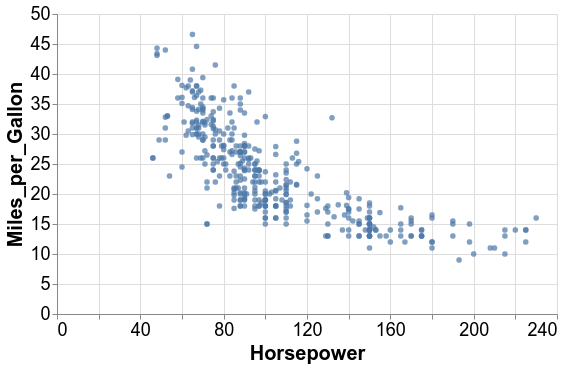

In [8]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

## Mark types

- mark_bar
- mark_area
- mark_circle
- mark_geoshape
- mark_point	
- mark_rect
- mark_rule
- mark_square
- mark_text	
- mark_tick

more info about marks [here](https://altair-viz.github.io/user_guide/marks.html#)

## Encodings  


- position encodings:

 - mapping the data to coordinates in space

- mark encodings:

 - color, size, shape, opacity, etc...
 
- facet encodings:
  - creating a group of charts each showing a different view of the data
  - charts arranged in rows or columns
 

 more info on encodings [here](https://altair-viz.github.io/user_guide/encoding.html)





# Live data exploration using grammar of graphics



In [9]:
cars=data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


I want to use a <font color="green">{}</font> as my geometric shape

I want to encode...
- <font color="green">{}</font> on the X axis
- <font color="green">{}</font> on the Y axis

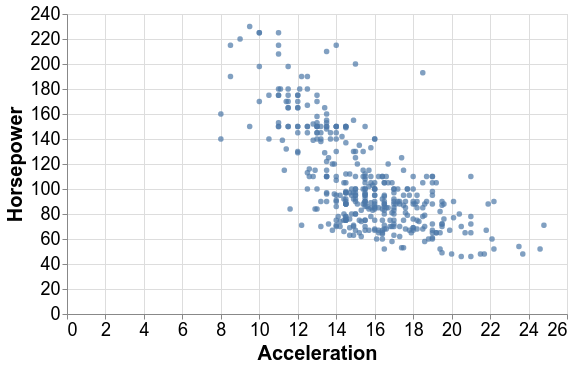

In [10]:
alt.Chart(cars).mark_circle().encode(
  x='Acceleration',
  y='Horsepower'
)

In [11]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


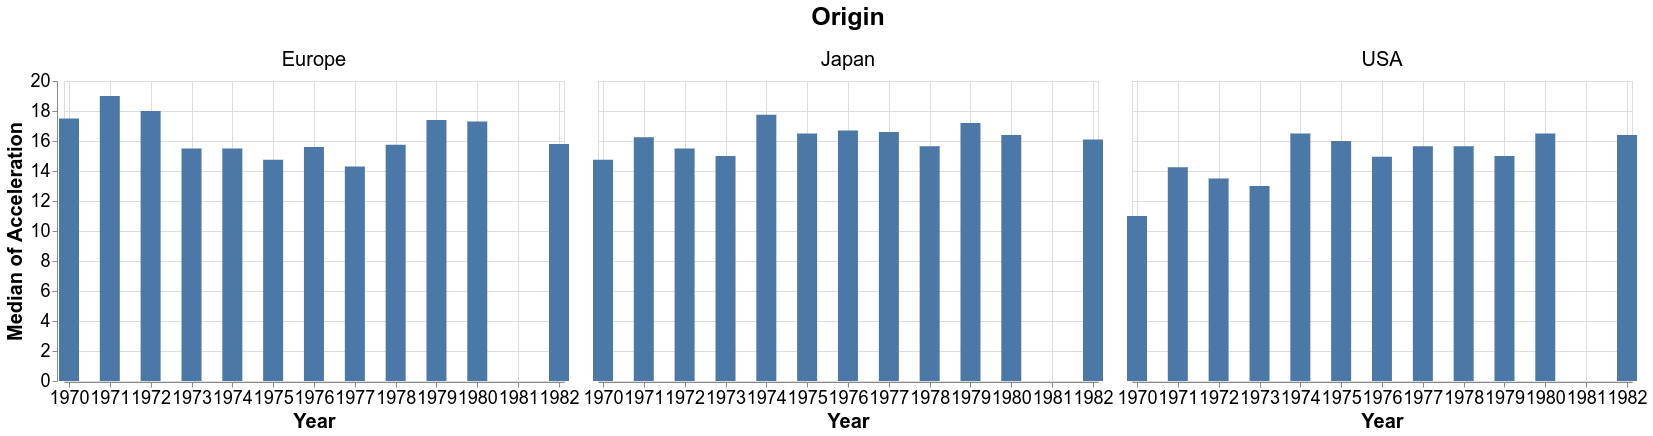

In [12]:
alt.Chart(cars).mark_bar().encode(
  x='Year',
  y='median(Acceleration)',
  column='Origin'
)

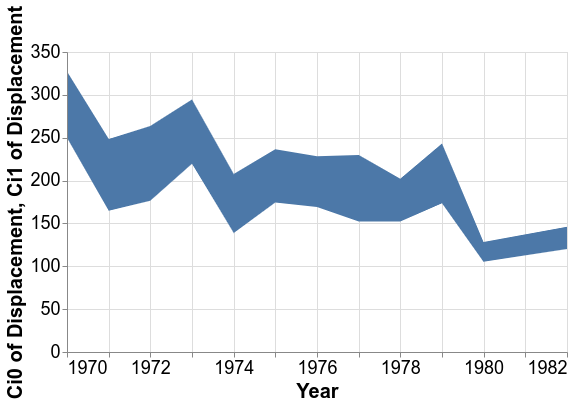

In [22]:
alt.Chart(cars).mark_area().encode(
  x='Year',
  y='ci0(Displacement)',
  y2='ci1(Displacement)'
  )

---

In [15]:
data.iowa_electricity.description
df=data.iowa_electricity()
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


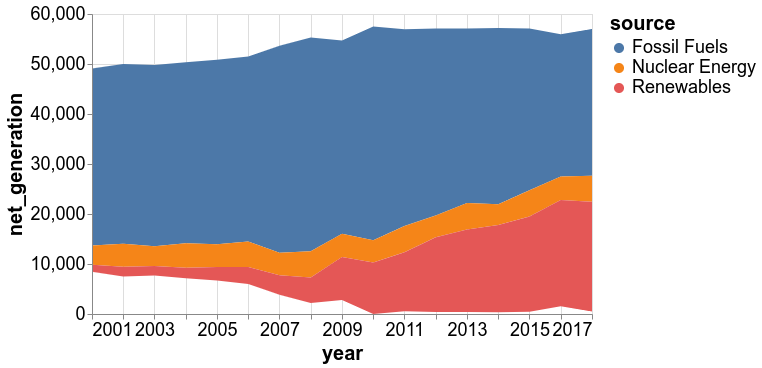

In [16]:
alt.Chart(df).mark_area().encode(
    x=alt.X('year'),
    y=alt.Y('net_generation', stack='center'),
    color='source'
)